#### 1. Add a credential in your Cloudant-gz service

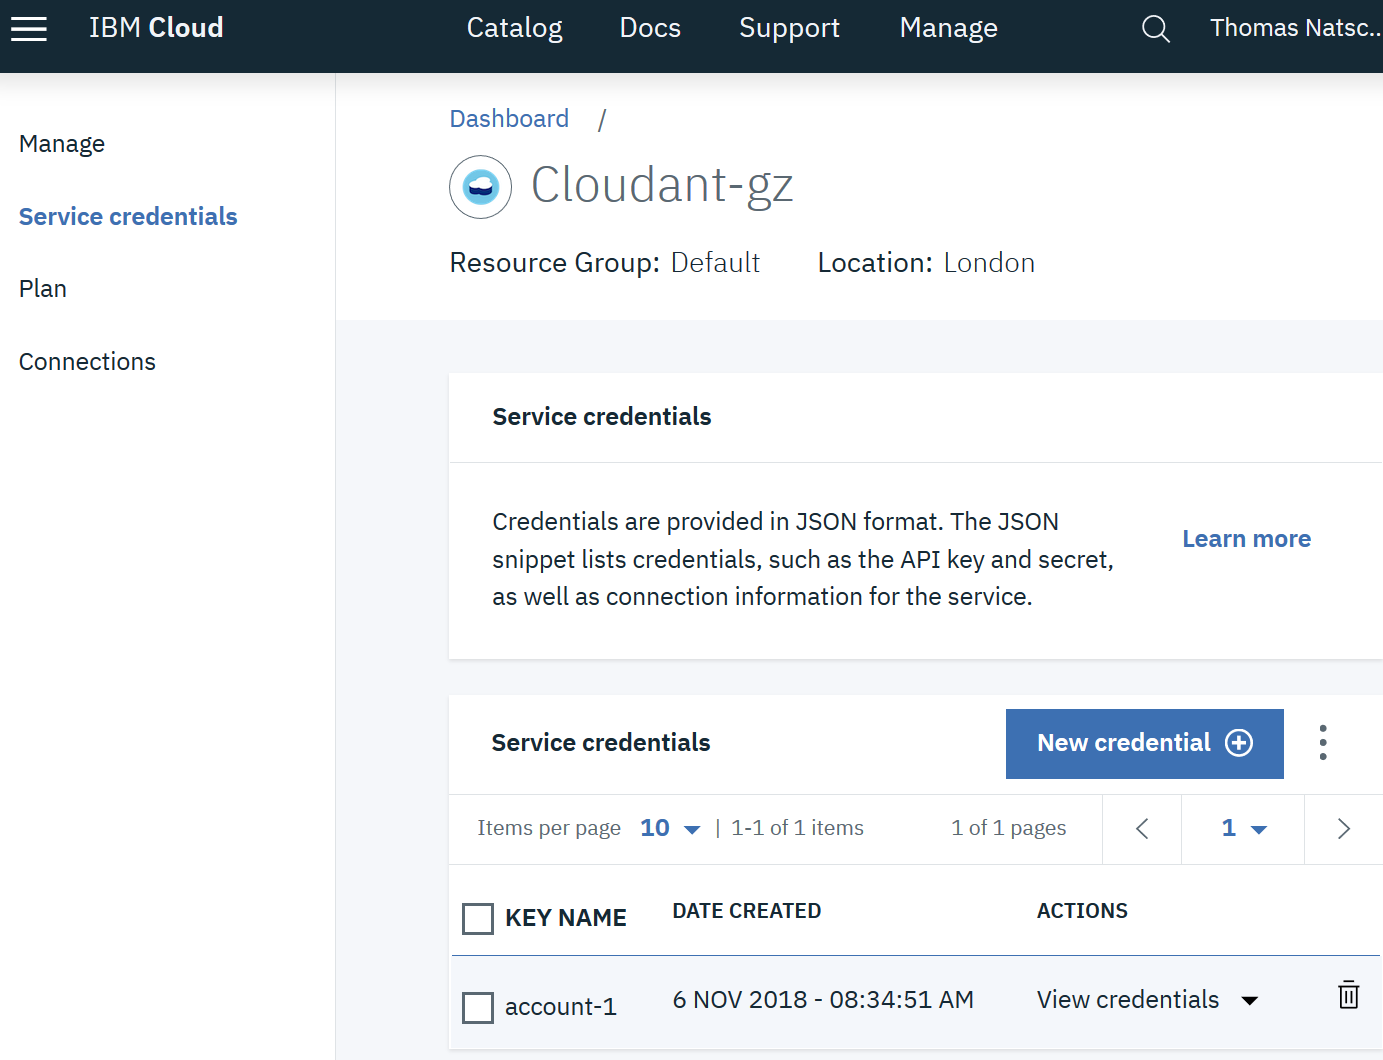

#### 2. Create A Cloudant Connection Asset in Watson Studio

* Goto IBM Watson Studio
* Goto to your project
* Add to project -> Data asset -> Connection

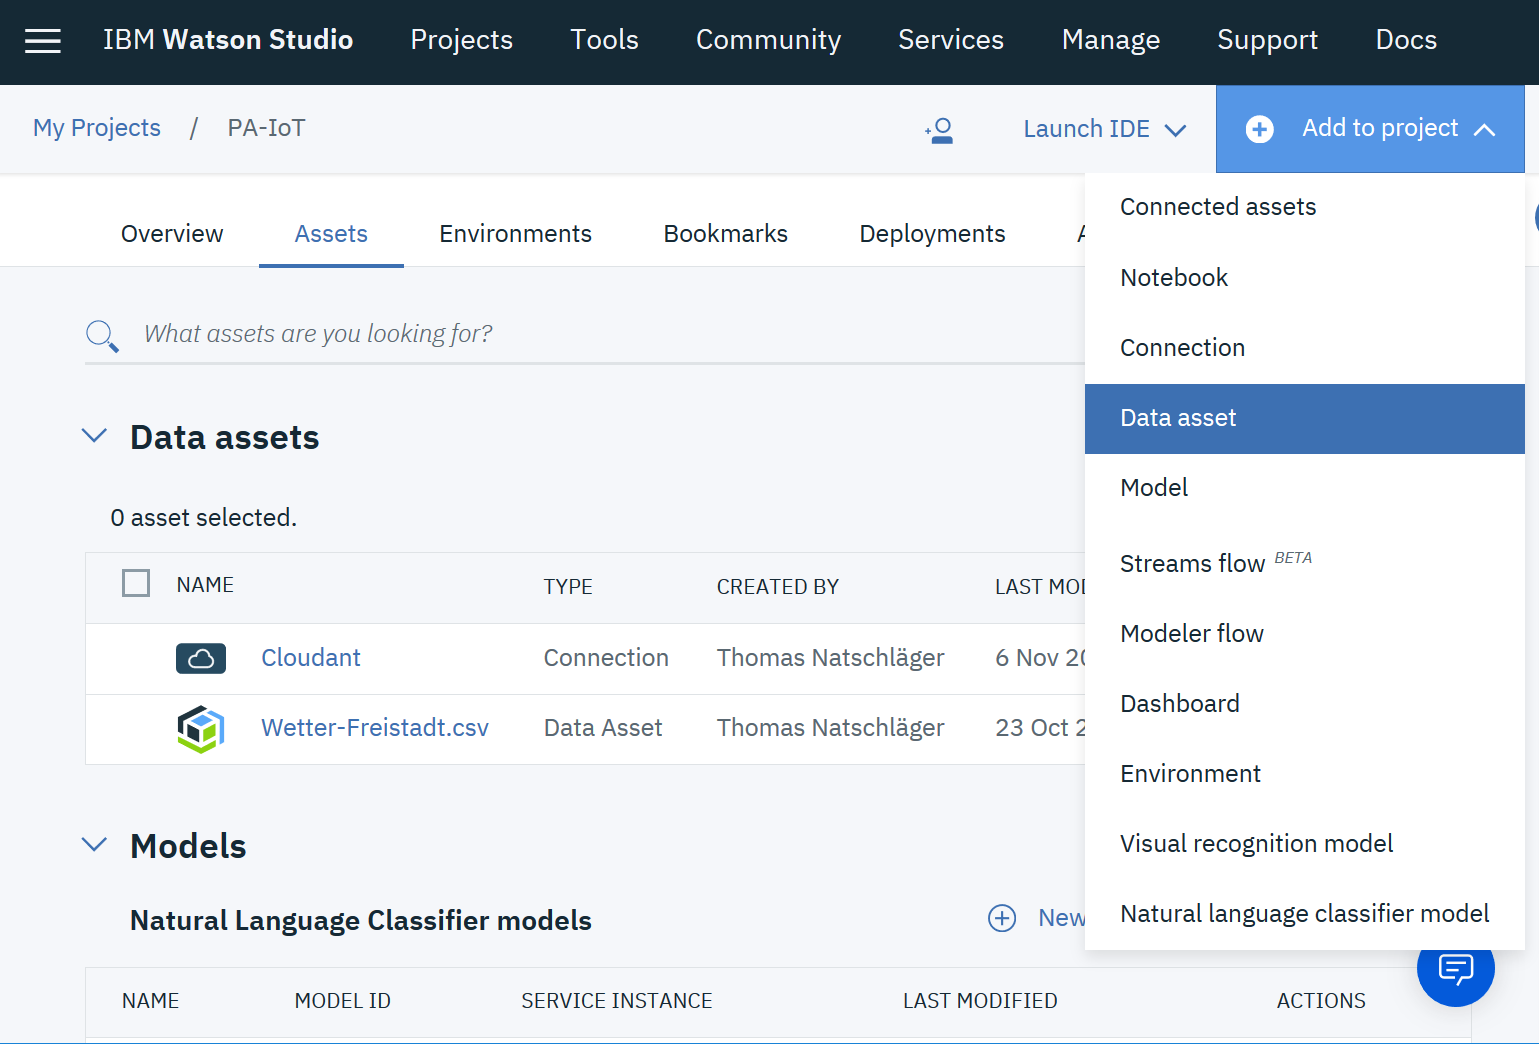

#### 3. Install python cloudant connector/client

Unfortunately the default Python runtime environment does not have this by default

In [2]:
!pip install cloudant

    100% |████████████████████████████████| 61kB 8.2MB/s eta 0:00:01
Requirement not upgraded as not directly required: requests<3.0.0,>=2.7.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from cloudant)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests<3.0.0,>=2.7.0->cloudant)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests<3.0.0,>=2.7.0->cloudant)
Requirement not upgraded as not directly required: urllib3<1.23,>=1.21.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests<3.0.0,>=2.7.0->cloudant)
Requirement not upgraded as not directly required: certifi>=2017.4.17 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests<3.0.0,>=2.7.0->cloudant)
  Running setup.py bdist_wheel for cloudant ... done
  Stored in directory: /home/dsxuser/.cache/pi

#### 4. Use the find / insert data -> Connections option to insert the credentials into the notebook

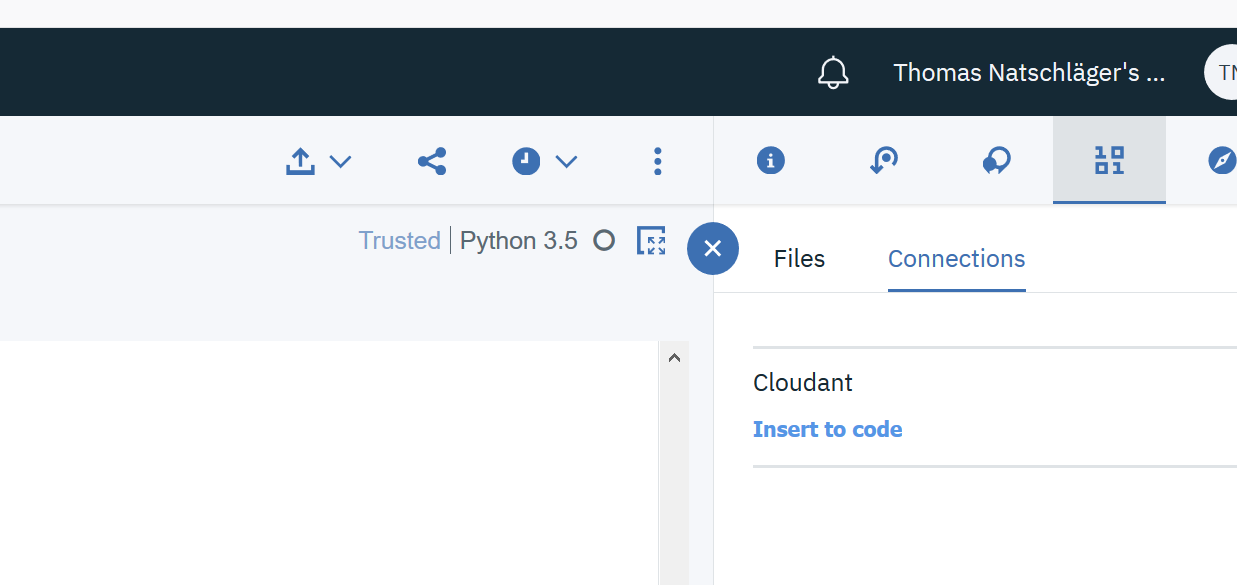

In [5]:
# The code was removed by Watson Studio for sharing.

#### 5. Create a Cloudant client

In [6]:
from cloudant.client import Cloudant
client = Cloudant(credentials['username'], credentials['password'], url=credentials['custom_url'], connect=True)

#### 6. Access the database using the Cloudant Python API

In [12]:
# select the database
database = client['sensehat']

In [13]:
from cloudant.result import Result, ResultByKey
from cloudant.query import Query

In [24]:
# Construct a Query
query = Query(database, selector={'_id': {'$gt': 0}}, fields=['compass','gyroscope','orientation','acceleration','timestamp'])

In [25]:
for doc in query(limit=5)['docs']:
    print(doc)

{'gyroscope': {'y': 0.0782, 'z': -0.0006, 'x': -0.0014}, 'orientation': {'roll': 119.47, 'yaw': 228.113, 'pitch': 0.0504}, 'acceleration': {'y': 0.877, 'z': -0.4939, 'x': -0.002}, 'compass': 228, 'timestamp': '2018-11-06T19:18:45.209Z'}
{'gyroscope': {'y': -0.0003, 'z': -0.0006, 'x': 0.0011}, 'orientation': {'roll': 119.3248, 'yaw': 228.1689, 'pitch': 0.0872}, 'acceleration': {'y': 0.8762, 'z': -0.4936, 'x': -0.002}, 'compass': 228, 'timestamp': '2018-11-06T19:18:45.967Z'}
{'gyroscope': {'y': 0.0021, 'z': -0.0006, 'x': 0.0011}, 'orientation': {'roll': 119.5089, 'yaw': 227.9233, 'pitch': 0.0501}, 'acceleration': {'y': 0.875, 'z': -0.4929, 'x': -0.0022}, 'compass': 228, 'timestamp': '2018-11-06T19:18:47.391Z'}
{'gyroscope': {'y': 0.0031, 'z': 0.0015, 'x': 0.0026}, 'orientation': {'roll': 119.372, 'yaw': 227.7974, 'pitch': 0.1424}, 'acceleration': {'y': 0.8758, 'z': -0.4941, 'x': -0.0022}, 'compass': 228, 'timestamp': '2018-11-06T19:18:47.965Z'}
{'gyroscope': {'y': 0.0028, 'z': -0.0006, '

In [26]:
from pandas import DataFrame

In [27]:
DataFrame.from_records(list(query(limit=5)['docs']))

,acceleration,compass,gyroscope,orientation,timestamp
0,"{'y': 0.877, 'z': -0.4939, 'x': -0.002}",228,"{'y': 0.0782, 'z': -0.0006, 'x': -0.0014}","{'roll': 119.47, 'yaw': 228.113, 'pitch': 0.0504}",2018-11-06T19:18:45.209Z
1,"{'y': 0.8762, 'z': -0.4936, 'x': -0.002}",228,"{'y': -0.0003, 'z': -0.0006, 'x': 0.0011}","{'roll': 119.3248, 'yaw': 228.1689, 'pitch': 0...",2018-11-06T19:18:45.967Z
2,"{'y': 0.875, 'z': -0.4929, 'x': -0.0022}",228,"{'y': 0.0021, 'z': -0.0006, 'x': 0.0011}","{'roll': 119.5089, 'yaw': 227.9233, 'pitch': 0...",2018-11-06T19:18:47.391Z
3,"{'y': 0.8758, 'z': -0.4941, 'x': -0.0022}",228,"{'y': 0.0031, 'z': 0.0015, 'x': 0.0026}","{'roll': 119.372, 'yaw': 227.7974, 'pitch': 0....",2018-11-06T19:18:47.965Z
4,"{'y': 0.8755, 'z': -0.4931, 'x': -0.0025}",228,"{'y': 0.0028, 'z': -0.0006, 'x': -0.0007}","{'roll': 119.3878, 'yaw': 227.7369, 'pitch': 0...",2018-11-06T19:18:48.347Z
